In [53]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import tensorflow

from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, TensorBoard as TensorBoardCallback

# Fashion Classification

TBU

In [2]:
RANDOM_SEED = 20210116

np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)

In [3]:
train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

# Dataset Overview

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train, y_train = train_df.drop(['label'], axis=1), train_df['label']
X_test, y_test = test_df.drop(['label'], axis=1), test_df['label']

<AxesSubplot:xlabel='label', ylabel='Count'>

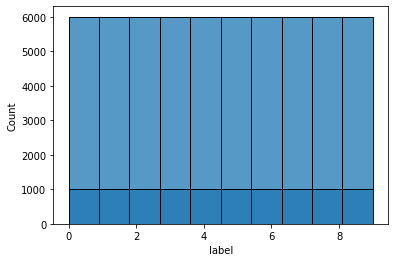

In [55]:
sns.histplot(data=y_train, bins=10)
sns.histplot(data=y_test, bins=10)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_SEED)

for train_idx, val_idx in splitter.split(X_train, y_train):
    X_train_val, y_train_val = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

In [8]:
label_name = [
    'T-shirt/Top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

label_num = len(label_name)

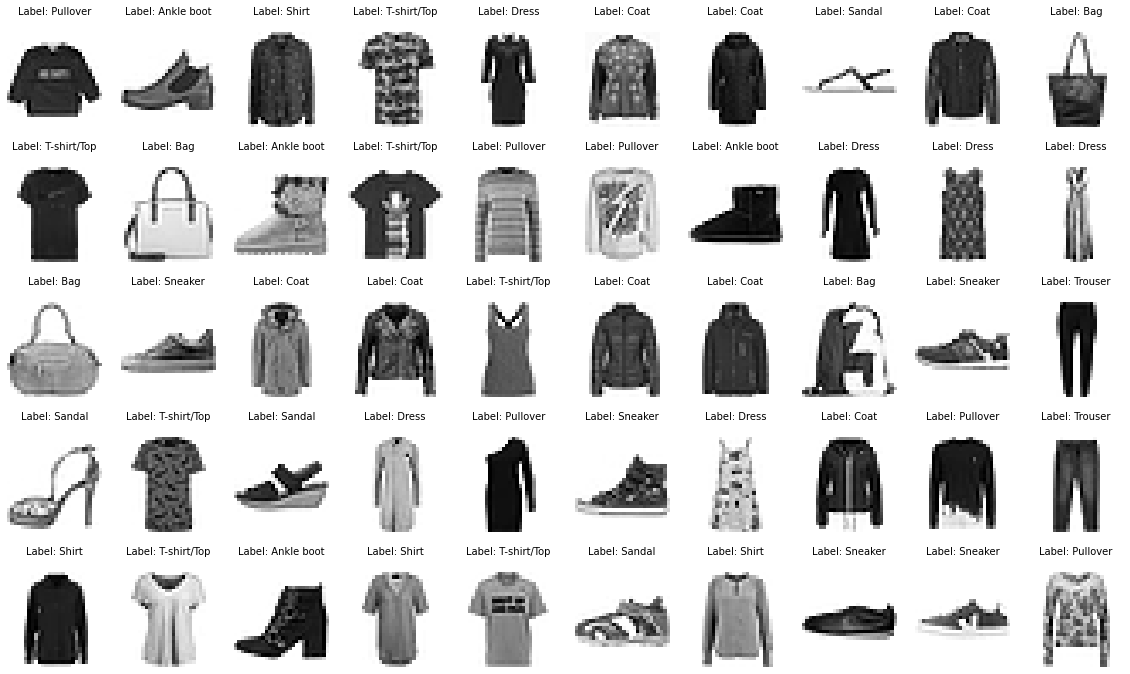

In [9]:
plt.figure(figsize=(20, 12))

for index, (image, label_idx) in enumerate(zip(X_train[0:50], y_train[0:50])):
    label = label_name[label_idx]

    ax = plt.subplot(5, 10, index + 1)
    ax.axis('off')

    plt.imshow(np.reshape(X_train.values[index], (28, 28)), cmap='binary')

    plt.title('Label: %s\n' % label, fontsize=10);

# Classification

In [42]:
def get_log_dir():
    training_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(os.curdir, 'logs', training_id)

In [10]:
input_layer = Input((784))

x = Dense(300, activation='relu')(input_layer)
x = Dense(100, activation='relu')(x)

output_layer = Dense(label_num, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'],
)

In [52]:
early_stopping_callback = EarlyStopping(patience=15, restore_best_weights=True)
tensorboard_callback = TensorBoardCallback(
    get_log_dir(), histogram_freq=1, write_graph=True, write_images=True
)

training_history = model.fit(
    X_train_val, y_train_val, 
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=[early_stopping_callback, tensorboard_callback]
)

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.9630 - val_loss: 0.3477 - val_accuracy: 0.8887
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9647 - val_loss: 0.3289 - val_accuracy: 0.8938
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1014 - accuracy: 0.9654 - val_loss: 0.3323 - val_accuracy: 0.8941
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1007 - accuracy: 0.9654 - val_loss: 0.3308 - val_accuracy: 0.8957
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0975 - accuracy: 0.9670 - val_loss: 0.3246 - val_accuracy: 0.8953
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1010 - accuracy: 0.9654 - val_loss: 0.3380 - val_accuracy: 0.8935
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0977 - accuracy: 0.9660 - val_loss: 0.3221 - val_accuracy:

In [50]:
training_history_df = pd.DataFrame(training_history.history)

(0.0, 1.0)

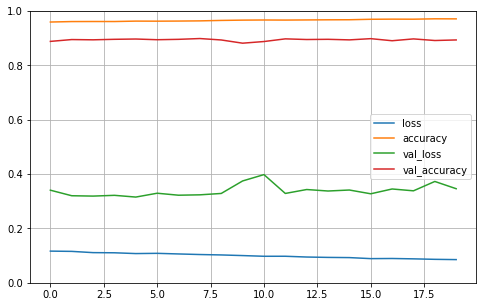

In [51]:
training_history_df.plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8957


[0.3189171850681305, 0.8956999778747559]